In [7]:
import sys
from cv2 import VideoCapture,cvtColor, absdiff,COLOR_BGR2RGB,COLOR_BGR2GRAY,CAP_PROP_FPS,CAP_PROP_FRAME_COUNT
from mediapipe.python.solutions.face_mesh import FaceMesh
from mediapipe.python.solutions.face_detection import FaceDetection
from pandas import read_csv, concat,DataFrame
from numpy import mean
from time import sleep
from glob import glob
from shutil import copy, move
import matplotlib.pyplot as plt
from gc import collect
import random
import numpy as np
from subprocess import run, Popen,DEVNULL, PIPE, STDOUT
import os

ModuleNotFoundError: No module named 'pandas'

In [8]:
face_mesh = FaceMesh(min_detection_confidence=0.2, static_image_mode=True)
face_detection = FaceDetection(model_selection=2, min_detection_confidence=0)

In [8]:
WORK_DIR = r"E:/Video Links Dataset"
CLIPPED_VIDEOS = WORK_DIR + r"/clipped/videos"
CLIPPED_ALIGNMENTS = WORK_DIR + r"/clipped/alignments"
DOWNLOADED_VIDEOS = WORK_DIR + r"/downloaded/videos"
DOWNLOADED_ALIGNMENTS = WORK_DIR + r"/downloaded/alignments"
FILTERED_VIDEOS = WORK_DIR + r"/filtered/videos"
FILTERED_ALIGNMENTS = WORK_DIR + r"/filtered/alignments"
LINK_DATASET = WORK_DIR + r"/Video Links Dataset.csv"
STATUS_DATASET = WORK_DIR + r"/Video Status.csv"
LOG_FILE_DOWN = WORK_DIR + r"/log_down.txt"
LOG_FILE_CLIP = WORK_DIR + r"/log_clip.txt"
LOG_FILE_FILT = WORK_DIR + r"/log_filt.txt"
PICKELS = WORK_DIR + r"/pickles"
DOWNLOADER = r"scripts/download_video.py"
CLIPPER = r"scripts/clip_video.py"
FILTERER = r'scripts/filter_videos.py'
RUNTIME = sys.executable.replace('\\','/')


In [88]:
videos = os.listdir(FILTERED_VIDEOS)
alignments = os.listdir(FILTERED_ALIGNMENTS )
print(len(videos), len(alignments))

2958 2870


In [31]:
video_with_no_alignments = []
alignments_with_no_videos = []
correct_videos = []

In [32]:
for i in videos:
    found = False 

    for g in alignments:

        if g.split(".")[0] == i.split(".")[0]:
            found = True
            break
    if found:
        correct_videos.append(i.split(".")[0])
    else:
        video_with_no_alignments.append(i.split(".")[0])

In [33]:
print(len(correct_videos),len(video_with_no_alignments))

2958 0


In [34]:
for i in alignments:
    if i.split(".")[0] not in correct_videos:
        alignments_with_no_videos.append(i.split(".")[0])
print(len(alignments_with_no_videos))

11294


In [36]:
alignments_with_no_videos[0]

'0_0'

In [37]:
for i in alignments_with_no_videos:
    os.remove(FILTERED_ALIGNMENTS+fr"/{i}.align")
    print("removed ",FILTERED_ALIGNMENTS+fr"/{i}.align")

removed  E:/Video Links Dataset/filtered/alignments/0_0.align
removed  E:/Video Links Dataset/filtered/alignments/0_10.align
removed  E:/Video Links Dataset/filtered/alignments/0_11.align
removed  E:/Video Links Dataset/filtered/alignments/0_12.align
removed  E:/Video Links Dataset/filtered/alignments/0_13.align
removed  E:/Video Links Dataset/filtered/alignments/0_23.align
removed  E:/Video Links Dataset/filtered/alignments/0_4.align
removed  E:/Video Links Dataset/filtered/alignments/0_5.align
removed  E:/Video Links Dataset/filtered/alignments/0_9.align
removed  E:/Video Links Dataset/filtered/alignments/100_10.align
removed  E:/Video Links Dataset/filtered/alignments/100_11.align
removed  E:/Video Links Dataset/filtered/alignments/100_158.align
removed  E:/Video Links Dataset/filtered/alignments/100_23.align
removed  E:/Video Links Dataset/filtered/alignments/100_297.align
removed  E:/Video Links Dataset/filtered/alignments/100_307.align
removed  E:/Video Links Dataset/filtered/ali

In [44]:
unique_words = {}

for i in correct_videos:
    with open(FILTERED_ALIGNMENTS + fr"/{i}.align", "r") as reader:
        content = reader.read()
        for word in content.split(): 
            if unique_words.get(word) == None:
                unique_words[word] = 1
            else:
                unique_words[word] += 1

print(len(unique_words.keys()))

6829


In [46]:
sorted(unique_words, key=unique_words.get, reverse=True)[:15]

['في',
 'ما',
 'من',
 'اللي',
 'انا',
 'ان',
 'على',
 'مش',
 'ده',
 'هو',
 'كده',
 'ايه',
 'انت',
 'يعني',
 'دي']

In [47]:
sorted(unique_words, key=unique_words.get, reverse=False)[:15]

['زميلي',
 'بعني',
 'وزير',
 'الافواه',
 'الصحفيين',
 'المعارضين',
 'نصبت',
 'الاستيج',
 'رحاب',
 'الع',
 'بتعمله',
 'اتصاب',
 'الدولاب',
 'بتاعها',
 'فحبيت']

In [ ]:
import matplotlib.pyplot as plt

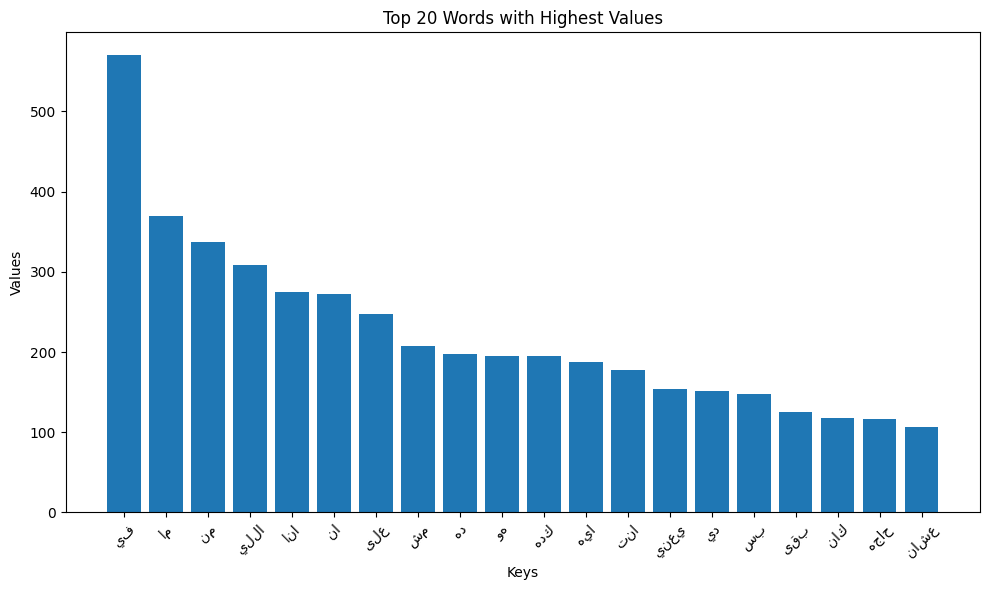

In [54]:
sorted_items = sorted(unique_words, key=unique_words.get, reverse=True)[:20]
top_keys = [item[::-1] for item in sorted_items[:20]]
top_values = [unique_words[item[::-1]] for item in top_keys]

plt.figure(figsize=(10, 6))
plt.bar(top_keys, top_values)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Top 20 Words with Highest Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
import cv2

In [91]:
frame_counts = []
for i in videos:
    cap = cv2.VideoCapture(FILTERED_VIDEOS+fr"/{i}")
    frame_counts.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    cap.release()


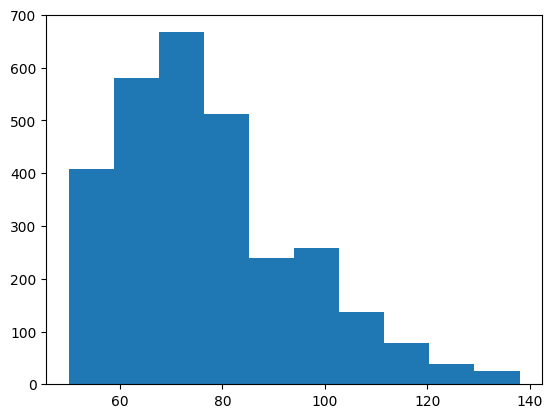

In [92]:
plt.hist(frame_counts,bins=10);

In [93]:
from collections import Counter

counter = Counter(frame_counts)

# Get the 20 least occurring numbers
least_occurring = [i for i, g in counter.most_common()[:-50:-1] if g < int(len(videos) * 0.005)]
print("Videos that will be removed")
print(len([i for i in frame_counts if i > np.mean(least_occurring)]))
print("New Max Frame Count")
print(max([i for i in frame_counts if i <= np.mean(least_occurring)]))
print("Video Left")
print(len([i for i in frame_counts if i <= np.mean(least_occurring)]))

Videos that will be removed
99
New Max Frame Count
115
Video Left
2845


In [89]:
for i,g in zip(videos,alignments):
    cap = cv2.VideoCapture(FILTERED_VIDEOS+fr"/{i}")
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    if frame_count > np.mean(least_occurring):
        os.remove(FILTERED_VIDEOS+fr"/{i}")
        # os.remove(FILTERED_ALIGNMENTS+fr"/{g}")
        print("removed ",FILTERED_VIDEOS+fr"/{i}")
        # print("removed ",FILTERED_ALIGNMENTS+fr"/{g}")

print("Videos Left")

videos = os.listdir(FILTERED_VIDEOS)
alignments = os.listdir(FILTERED_ALIGNMENTS)

print(len(videos))
print(len(alignments))

# for i, g in least_occurring:

#     if max_num == None:
#         max_num = g
#         max_key = i

#     if max_key > i:
#         max_key = i
#         max_num = g
# print("Key with the lowest frame rate and lowest occurence")
# print(max_key, max_num)
# highest_least_occurning = None
# highest_least_occurning_count = 0
# # Print the result
# for num, count in least_occurring:

#     if not highest_least_occurning:
#         highest_least_occurning = num
#         highest_least_occurning_count = count
#     else:
#         if highest_least_occurning_count < count:
#             highest_least_occurning = num
#             highest_least_occurning_count = count

# print("The highest least occurring number is:")
# print(f"Number: {highest_least_occurning}, Occurrences: {highest_least_occurning_count}")

removed  E:/Video Links Dataset/filtered/videos_25fps/129_527.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/224_265.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/63_12.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/63_121.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/63_31.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/63_595.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/63_717.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/63_972.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/64_14.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/64_258.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/64_418.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/64_501.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/64_697.mp4
removed  E:/Video Links Dataset/filtered/videos_25fps/64_834.mp4
Videos Left
2944
2870


In [3]:
from num2words import num2words

In [26]:
num2words("٨٠", lang='ar')

'ثمانون'

In [24]:
import os
words_to_check= []
shit = True
for filename in os.listdir( WORK_DIR + r"/filtered/num_alignments"):
    if not shit:
        break
    if filename.endswith('.align'):
        filepath = os.path.join( WORK_DIR + r"/filtered/num_alignments", filename)
        
        with open(filepath, 'r') as file:
            for line in file:
                word = line.strip()
                
                if "٠" in word:
                    print(word)
                    print(filepath)


و٨٠
E:/Video Links Dataset/filtered/num_alignments\42_520.align


In [25]:
import os
from num2words import num2words

# Directories
input_directory = FILTERED_ALIGNMENTS
output_directory = WORK_DIR + r"/filtered/num_alignments"

# Create output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

def normalize_arabic(text):
    normalization_map = {
        'أ': 'ا',
        'إ': 'ا',
        'آ': 'ا',
        'ى': 'ي',
        'ؤ': 'و',
        'ئ': 'ي',
        'ة': 'ه',
        'آ':"ا"
    }

    for letter, normalized_letter in normalization_map.items():
        text = text.replace(letter, normalized_letter)
    return text

# Function to process words
def process_word(word):
    try:
        return num2words(word, lang='ar')
    except Exception:

        return word
    

for filename in os.listdir(input_directory):
    if filename.endswith('.align'):
        input_filepath = os.path.join(input_directory, filename)
        output_filepath = os.path.join(output_directory, filename)
        
        with open(input_filepath, 'r') as file:
            words = file.readlines()
        
        processed_words = []
        for word in words:
            word = word.strip()
            processed_word = normalize_arabic(process_word(word))
            processed_words.append(processed_word)
        
        # Write the processed words to the new file in the output directory
        with open(output_filepath, 'w') as file:
            for processed_word in processed_words:
                file.write(processed_word + '\n')
